In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_prepare_data():
    # Load the PubMed Summarization dataset
    dataset = load_dataset("scientific_papers", "pubmed", split='train')

    # Display some basic information about the dataset
    print("Dataset info:")
    print(dataset)

    # Show the first few examples
    print("\nFirst few examples:")
    print(dataset[:5])

    return dataset

# Load and prepare the data
dataset = load_and_prepare_data()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset info:
Dataset({
    features: ['article', 'abstract', 'section_names'],
    num_rows: 119924
})

First few examples:
{'article': ["a recent systematic analysis showed that in 2011 , 314 ( 296 - 331 ) million children younger than 5 years were mildly , moderately or severely stunted and 258 ( 240 - 274 ) million were mildly , moderately or severely underweight in the developing countries .\nin iran a study among 752 high school girls in sistan and baluchestan showed prevalence of 16.2% , 8.6% and 1.5% , for underweight , overweight and obesity , respectively .\nthe prevalence of malnutrition among elementary school aged children in tehran varied from 6% to 16% .\nanthropometric study of elementary school students in shiraz revealed that 16% of them suffer from malnutrition and low body weight .\nsnack should have 300 - 400 kcal energy and could provide 5 - 10 g of protein / day . nowadays , school nutrition programs are running as the national programs , world - wide . national 

In [2]:
df = pd.DataFrame(dataset)

# Display basic information about the dataset
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119924 entries, 0 to 119923
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   article        119924 non-null  object
 1   abstract       119924 non-null  object
 2   section_names  119924 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB
None


In [3]:
# Display the first few examples
print("\nFirst few examples:")
print(df.head())


First few examples:
                                             article  \
0  a recent systematic analysis showed that in 20...   
1  it occurs in more than 50% of patients and may...   
2  tardive dystonia ( td ) , a rarer side effect ...   
3  lepidoptera include agricultural pests that , ...   
4  syncope is caused by transient diffuse cerebra...   

                                            abstract  \
0   background : the present study was carried ou...   
1   backgroundanemia in patients with cancer who ...   
2   tardive dystonia ( td ) is a serious side eff...   
3   many lepidopteran insects are agricultural pe...   
4   we present an unusual case of recurrent cough...   

                                       section_names  
0  INTRODUCTION\nMATERIALS AND METHODS\nParticipa...  
1  Introduction\nPatients and methods\nStudy desi...  
2  INTRODUCTION\nCASE REPORT\nDISCUSSION\nDeclara...  
3  1. Introduction\n2. Insect Immunity\n3. Signal...  
4  Introduction\nCase report\n

In [4]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       article                                           abstract  \
count   119924                                             119924   
unique  116924                                             119832   
top              these are peer - reviewed poster - platform s...   
freq      2816                                                 15   

                                section_names  
count                                  119924  
unique                                  61410  
top     INTRODUCTION\nCASE REPORT\nDISCUSSION  
freq                                     3558  


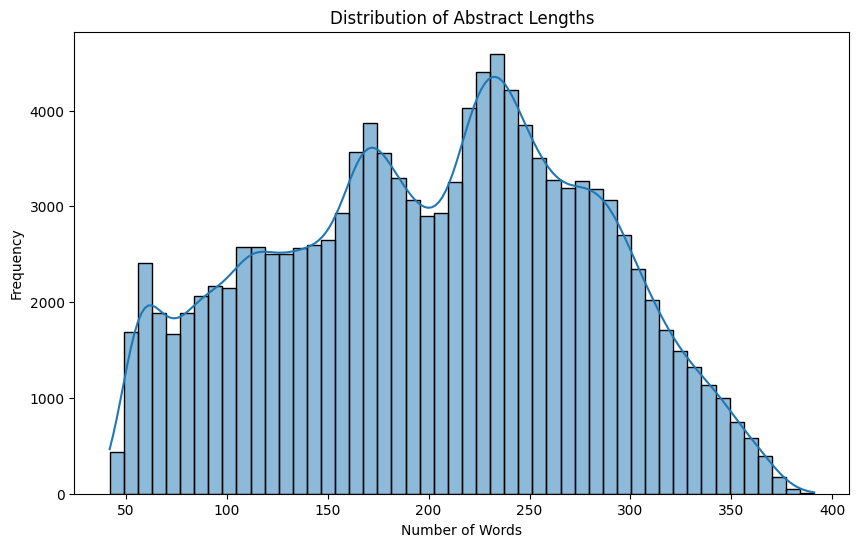

In [5]:
# Distribution of abstract lengths
df['abstract_length'] = df['abstract'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['abstract_length'], bins=50, kde=True)
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


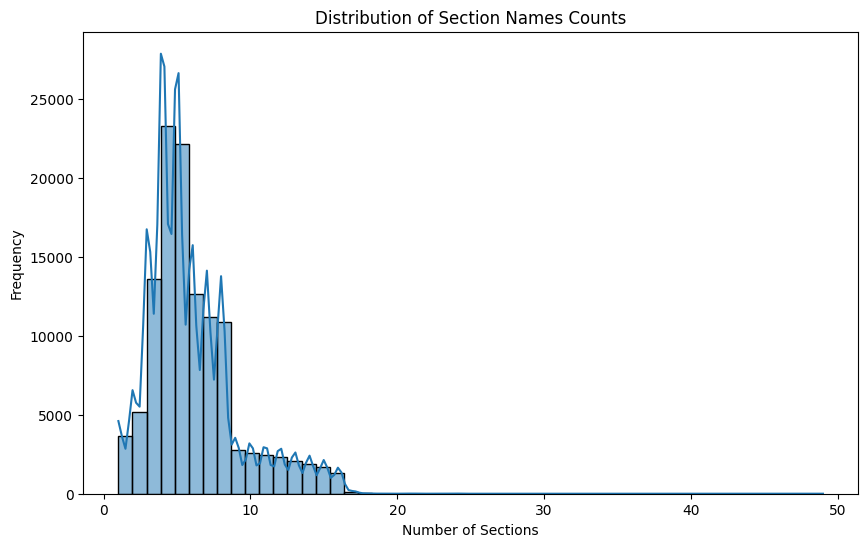

In [6]:
# Distribution of section names
section_counts = df['section_names'].apply(lambda x: len(x.split('\n')) if isinstance(x, str) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(section_counts, bins=50, kde=True)
plt.title('Distribution of Section Names Counts')
plt.xlabel('Number of Sections')
plt.ylabel('Frequency')
plt.show()


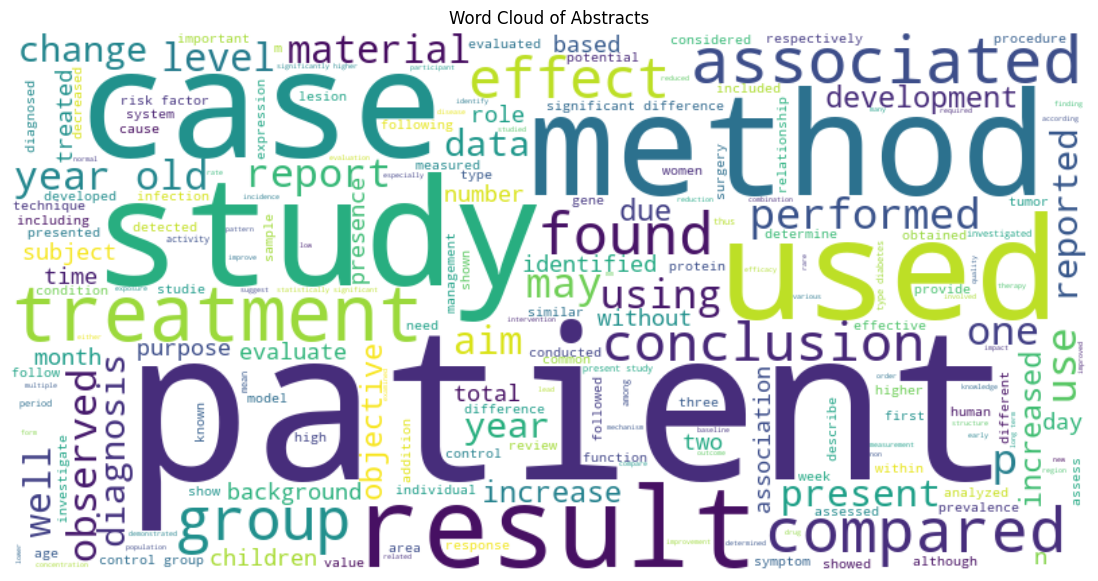

In [7]:

# Word cloud of common words in abstracts
from wordcloud import WordCloud

abstract_text = ' '.join(df['abstract'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstract_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts')
plt.show()


In [8]:
# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
article            0
abstract           0
section_names      0
abstract_length    0
dtype: int64


In [9]:
import pandas as pd
import re

# Define a basic function to preprocess text
def basic_preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    return text

# Assuming `df` is your DataFrame already loaded with the dataset
# Ensure the columns exist in the DataFrame
if 'article' in df.columns and 'abstract' in df.columns:
    # Apply the basic preprocessing function to the text columns
    df['cleaned_article'] = df['article'].apply(basic_preprocess_text)
    df['cleaned_abstract'] = df['abstract'].apply(basic_preprocess_text)


    # Display the first few rows of the cleaned data
    print(df[['cleaned_article', 'cleaned_abstract']].head())
else:
    print("Columns 'article' and 'abstract' not found in the DataFrame.")


                                     cleaned_article  \
0  a recent systematic analysis showed that in   ...   
1  it occurs in more than  of patients and may re...   
2  tardive dystonia  td   a rarer side effect aft...   
3  lepidoptera include agricultural pests that  t...   
4  syncope is caused by transient diffuse cerebra...   

                                    cleaned_abstract  
0   background  the present study was carried out...  
1   backgroundanemia in patients with cancer who ...  
2   tardive dystonia  td  is a serious side effec...  
3   many lepidopteran insects are agricultural pe...  
4   we present an unusual case of recurrent cough...  


In [10]:
# Save the preprocessed DataFrame to a CSV file
df.to_csv('cleaned_pubmed_dataset.csv', index=False)
